## TASK 2 - Image stitching

Group Number: #Group 11-13 12


### 1. Data import and SIFT Extraction

Complete ***get_panorama_data(..)*** in _dataset.py_ to read the images and extract the SIFT keypoints and descriptors per image. Check your implementation by plotting the result using ***utils.plot_keypoints(..)***.


***Submission:*** Save the *second* image (from left) of the campus dataset as **task2_keypoints.png** using ***utils.plot_keypoints(..)***.

In [1]:
%load_ext autoreload
%autoreload 1
%aimport transforms, panorama, mapping, dataset, utils
import matplotlib.pyplot as plt
import numpy as np
import transforms
import panorama
import mapping
import dataset
import utils
import cv2

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 150

data_path = 'data/office'

officeview1.jpg
officeview2.jpg
officeview3.jpg
officeview4.jpg
officeview5.jpg
5 5 5


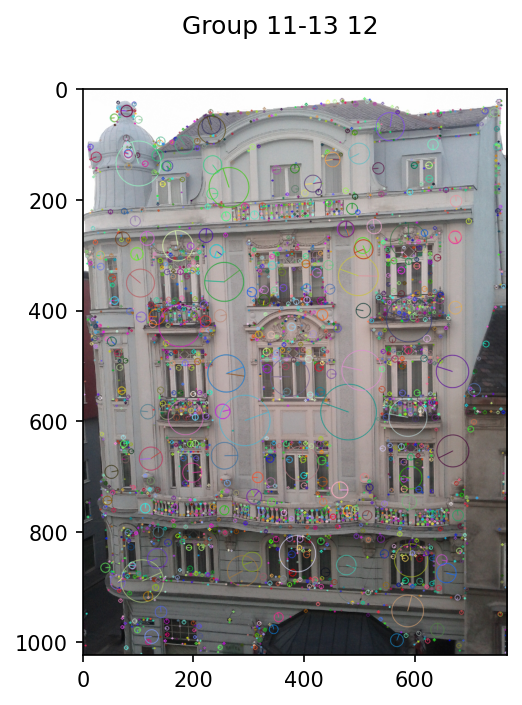

Number of images:  5
Keypoints length:  2725
Descriptor shape:  (2725, 128)


In [2]:
#student_code start
images, keypoints, descriptors = dataset.get_panorama_data(data_path)
print(len(images), len(keypoints), len(descriptors))
utils.plot_keypoints(images[1], keypoints[1],"Group 11-13 12", "task2_keypoints.png")
#student_code end

# check import
print('Number of images: ', len(images))
print('Keypoints length: ', len(keypoints[0]))
print('Descriptor shape: ', descriptors[0].shape)

***
#### What is the meaning of the size of the drawn circles and lines inside the circles?

#### The size of circle is magnitude of keypoint, the line is direction

#### 1.1 Matching

Let's take a look at the matching. Plot the matches between two adjacent images using ***mapping.calculate_matches(..)*** and ***utils.plot_matches(..)***.


***Submission:*** Save plot of matches between the *second and the third image* image of the campus dataset as **task2_matches.png** using ***utils.plot_matches(..)***.


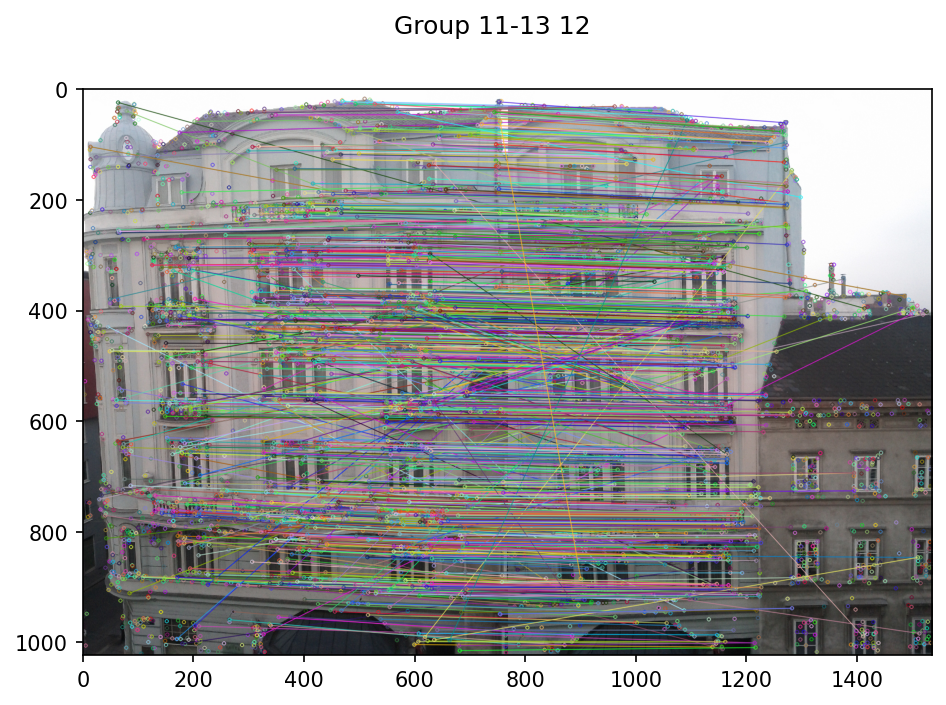

In [3]:

index1 = 1
index2 = 2

#student_code start
des1 = descriptors[index1]
des2 = descriptors[index2]
kp1 = keypoints[index1]
kp2 = keypoints[index2]
im1 = images[index1]
im2 = images[index2]
matches = mapping.calculate_matches(des1, des2)
utils.plot_matches(im1, im2, kp1, kp2, matches, "Group 11-13 12", "task2_matches.png")
#student_code end

***
#### Describe below how the matching, based on LOWE, works.

### It looks for the n=2 nearest neighbours, calculates LOWE ratio tests and if the distances are different enough. If they are, it keeps, otherwise, match is rejected.

### 2. Image Registration using RANSAC

As you can see in the keypoint matching plot above, the matching algorithm still has some wrong connections. To remove those outliers, you will implement RANSAC and use the remaining inliers to estimate a final tranformation matrix (homography) between two given images. Implement RANSAC in ***get_transform(..)*** in _transforms.py_.

Check your implementation by plotting the result using ***utils.plot_matches(..)***.


***Submission:*** Save a plot showing the matches between the *second and the third image* of the campus dataset again, using the calculated inliers, as **task2_matches_ransac.png** using ***utils.plot_matches(..)***.

3415 2858 1221
854


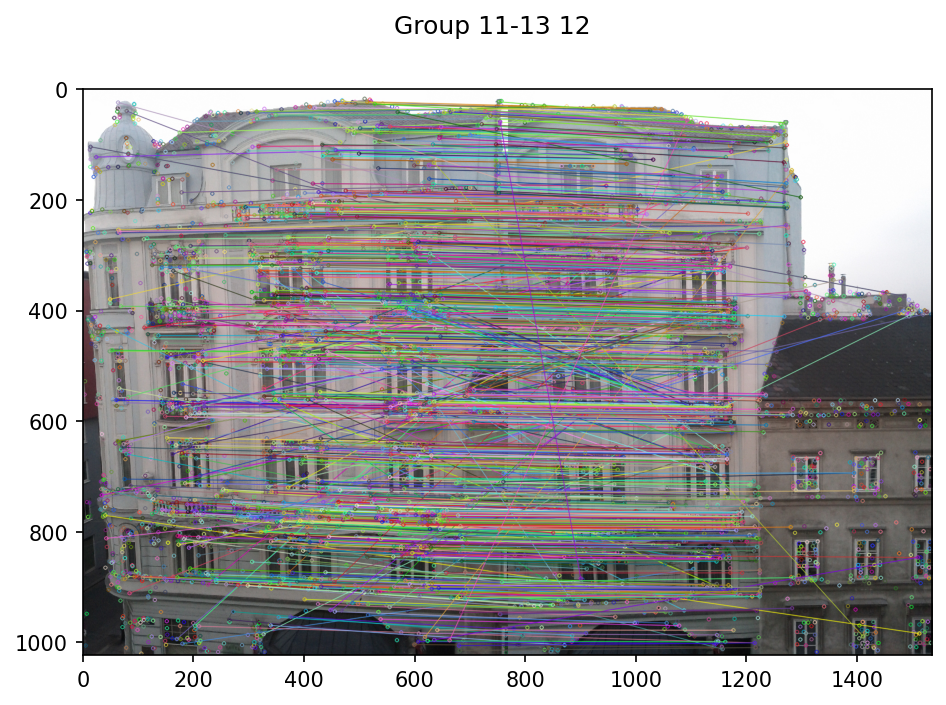

In [4]:

#student_code start
print(len(kp1), len(kp2), len(matches))
matches = mapping.calculate_matches(des1, des2)
tranform_M, inliers_indexes = transforms.get_transform(kp1, kp2, matches)
ms = [matches[index] for index in inliers_indexes]
print(len(ms))
utils.plot_matches(im1, im2, kp1, kp2, matches, "Group 11-13 12", "task2_matches_ransac.png")

#student_code end

***
#### What is the difference to the set of all putative matches you plotted before?

#### ~30% (366 of 1221) outliers are not present.

#### 2.1 Align Images

Test your homography after RANSAC by transforming a chosen image to the corresponding image on the right and plot with ***transforms.plot_transformed_image(..)***.

_***HINT:***_
_cv2.warpPerspective(..)_


***Submission:*** Save the second image of the campus dataset transformed onto the third one as **task2_matches_transformed.png** using ***utils.plot_transformed_image(..)***.

(1024, 768, 3)


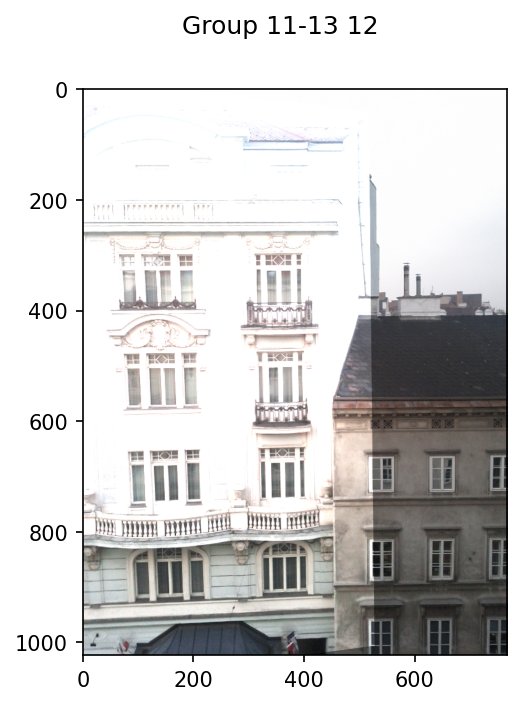

In [18]:
#student_code start
result = cv2.warpPerspective(im1, tranform_M, (im2.shape[1],im2.shape[0]))
print(result.shape)
utils.plot_transformed_image(result, im2, "Group 11-13 12", "task2_matches_transformed.png")
#student_code end

### 3. Image Stitching

Before, you implemented the basics to calculated homographies between two images. Further, transform all images to a reference image, usually the center one, to get a balanced panorama. Implement and use the method ***to_center(..)*** in _transforms.py_ to get all homographies to the center image.


In [19]:
#student_code start
Hs_center = transforms.to_center(descriptors, keypoints)
#student_code end

#### Panorama Extents

One final step before panorama composition is to estimate the final panorama size based on the obtained homographies. Implement ***transforms.get_panorama_extents(..)***

#### Simple Panorama  

Here is where the magic happens. Using the homographies, translation matrix and panorama extents, you can now stitch the images to a panorama. Implement ***panorama.get_simple(..)*** and check your result with ***utils.plot_panorama(..)***.

***Submission:*** Save the campus panorama as **task2_panorama_simple.png** using ***utils.plot_panorama(..)***.

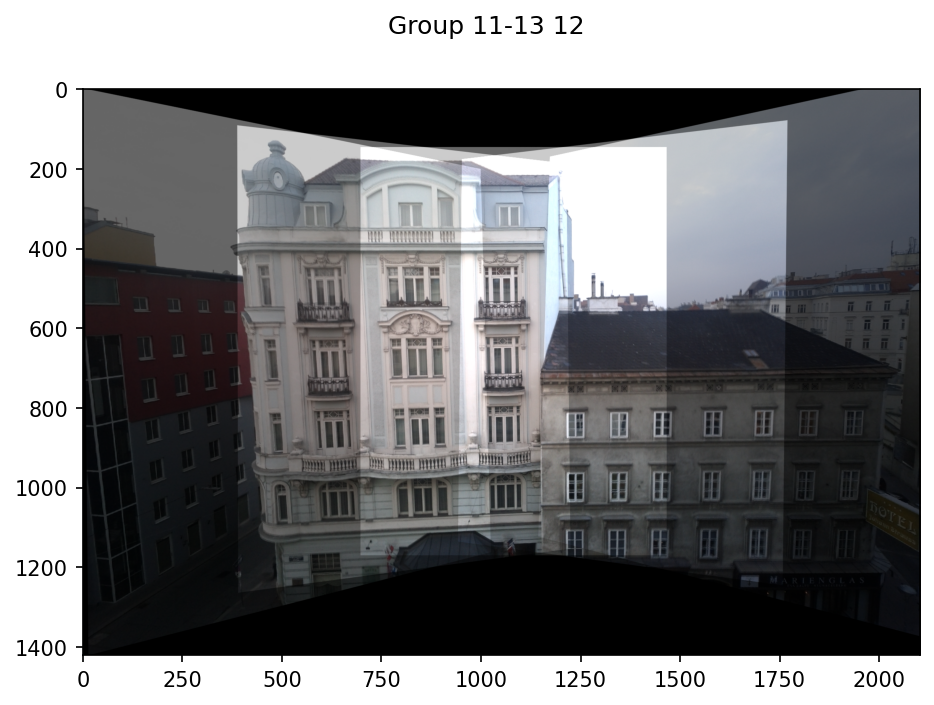

In [20]:
#student_code start
T, width, height = transforms.get_panorama_extents(images, Hs_center)
utils.plot_panorama(panorama.get_simple(images, width, height, Hs_center, T), "Group 11-13 12", "task2_panorama_simple.png" )
#student_code end

### 4. Panorama Feathering

The simple panorama might look geometrically correct, but not pleasant enough yet. The intensities are simply stacked. Implement a color blending method to improve the panorama output. 

Complete ***panorama.get_blended(..)*** and check your result with ***utils.plot_panorama(..)***.

***Submission:*** Save the improved blended campus panorama as **task2_panorama_blended.png** using ***utils.plot_panorama(..)***.

In [ ]:
#student_code start

#student_code end


***
#### Compare the result achieved with feathering to the result where no blending has been performed. What is the difference of the two results?

#ANSWER HERE

***
#### Examine if the presented scheme of SIFT interest point detection and RANSAC-based alignment is invariant to changes in image rotation and scale. Thus, resize and rotate the second image of the campus dataset and repeat the panorama process. What do you observe?

***Submission:*** Save the resulting panorama with the rotated images as file ***panorama_rotated_blended.png*** (feathered)

#ANSWER HERE

***
#### Once again, repeat the panorama procedure with your own image sequence. Save and discuss the achieved results. The result might look quite realistic at a first glance but can you spot any errors by looking on details?

***Submission:*** Save the resulting panorama as file ***panorama_own.png*** (feathered) 

#ANSWER HERE